# In this project we will be working advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.
This data set contains the following features:
* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
adv_df = pd.read_csv('advertising.csv')

In [15]:
adv_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [16]:
adv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [17]:
adv_df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [18]:
df=adv_df

# Reading Timestamp and splitting it into Date and time columns

In [19]:
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
df['Time'] = pd.to_datetime(df['Timestamp']).dt.time

In [20]:
df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Date,Time
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016-03-27,00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016-04-04,01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016-03-13,20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016-01-10,02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016-06-03,03:36:18


# Splitting Date column into further date , month and year

In [21]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Date'] = pd.DatetimeIndex(df['Date']).day
df['year_month'] = pd.to_datetime(df['Date']).dt.to_period('M')
df=df.drop(columns=['Ad Topic Line','City','Country','Timestamp','Time','year_month'])

In [22]:
df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Date,Year,Month
0,68.95,35,61833.90,256.09,0,0,27,2016,3
1,80.23,31,68441.85,193.77,1,0,4,2016,4
2,69.47,26,59785.94,236.50,0,0,13,2016,3
3,74.15,29,54806.18,245.89,1,0,10,2016,1
4,68.37,35,73889.99,225.58,0,0,3,2016,6


In [23]:
adv_df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Date,Time,Year,Month,year_month
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,27,00:53:11,2016,3,1970-01
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,4,01:39:02,2016,4,1970-01
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,13,20:35:42,2016,3,1970-01
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,10,02:31:19,2016,1,1970-01
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,03:36:18,2016,6,1970-01


# Exploratory Data Analysis
Here using seaborn to explore the data!


# Insight 1 : Potting Histogram with respect to Age , we can see that majority of the people are between 27 to 42 years

Text(0.5,0,'Age')

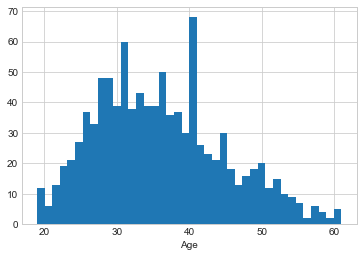

In [25]:
sns.set_style('whitegrid')
adv_df['Age'].hist(bins=40)
plt.xlabel('Age')

In [26]:
adv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
Date                        1000 non-null int64
Time                        1000 non-null object
Year                        1000 non-null int64
Month                       1000 non-null int64
year_month                  1000 non-null object
dtypes: float64(3), int64(6), object(6)
memory usage: 117.3+ KB


# Jointplot showing the kde distributions of 'Daily Time spent on site' vs 'Age'

# Insight 2 : Users who are around the age of 30 yrs are spending maximum amount of time on site .i.e. around 80

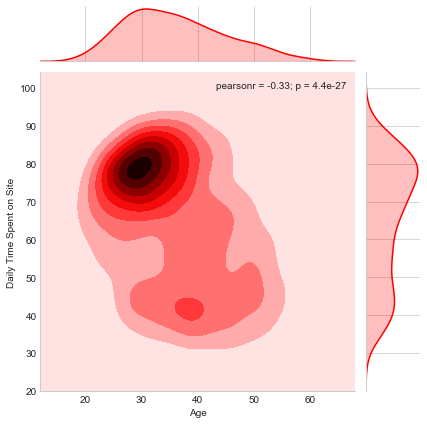

In [27]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=adv_df,color='red',kind='kde');

# Jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'

# Insight 3: Here we can see that users who are spending maximum of time on site are also approximatly same set of users who are having highest internet usage.

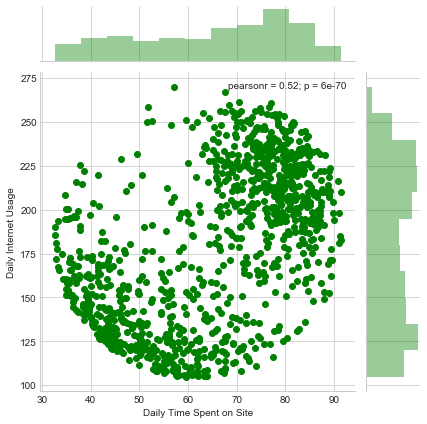

In [29]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=adv_df,color='green')

In [30]:
adv_df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Date,Time,Year,Month,year_month
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,27,00:53:11,2016,3,1970-01
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,4,01:39:02,2016,4,1970-01
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,13,20:35:42,2016,3,1970-01
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,10,02:31:19,2016,1,1970-01
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,03:36:18,2016,6,1970-01


# Insight 4: Here majority of people above the age of 30 are more clicking on advertisement although there is small clusters of user in exception

Text(0.5,0,'Age')

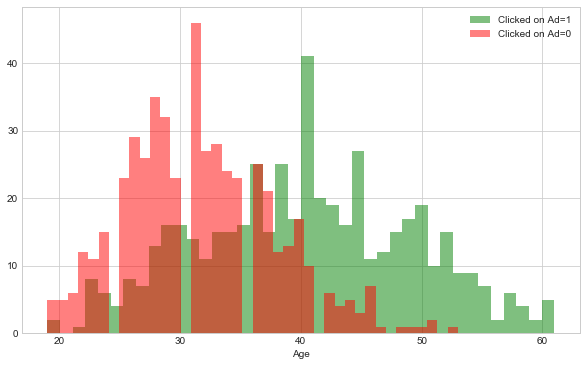

In [31]:
plt.figure(figsize=(10,6))
df[df['Clicked on Ad']==1]['Age'].hist(alpha=0.5,color='green',
                                              bins=40,label='Clicked on Ad=1')
df[df['Clicked on Ad']==0]['Age'].hist(alpha=0.5,color='red',
                                              bins=40,label='Clicked on Ad=0')
plt.legend()
plt.xlabel('Age')

# Insight 5 : User who have Daily Internet Usage less than 200 units are more prone to Clicking on Advertisment

Text(0.5,0,'Daily Internet Usage')

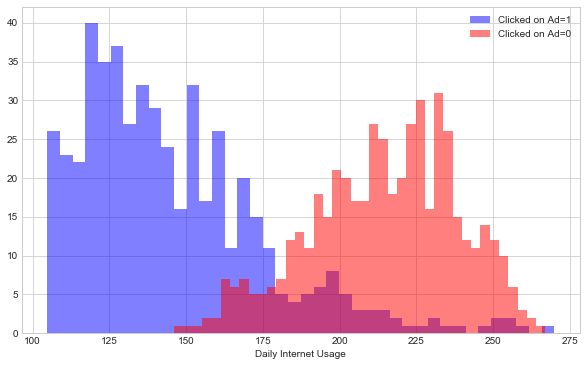

In [37]:
plt.figure(figsize=(10,6))
df[df['Clicked on Ad']==1]['Daily Internet Usage'].hist(alpha=0.5,color='blue',
                                              bins=40,label='Clicked on Ad=1')
df[df['Clicked on Ad']==0]['Daily Internet Usage'].hist(alpha=0.5,color='red',
                                              bins=40,label='Clicked on Ad=0')
plt.legend()
plt.xlabel('Daily Internet Usage')

# Insight 6 : Joint Plot and Count Plot of Age with Clicked on Ad field. Here we can see that users who are around age of 30 years have high probability of not clicking on advertisement, whereas as the users age is increased we can see there is more interest in clicking advertisement.

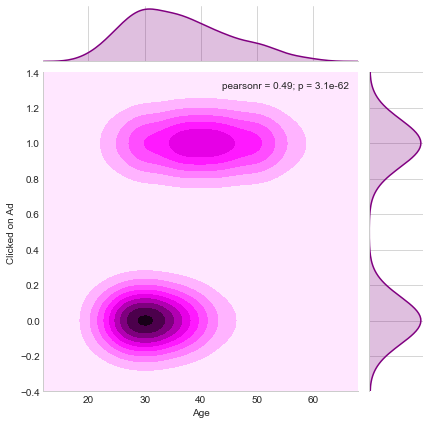

In [38]:
sns.jointplot(x='Age',y='Clicked on Ad',data=df,color='purple',kind='kde')

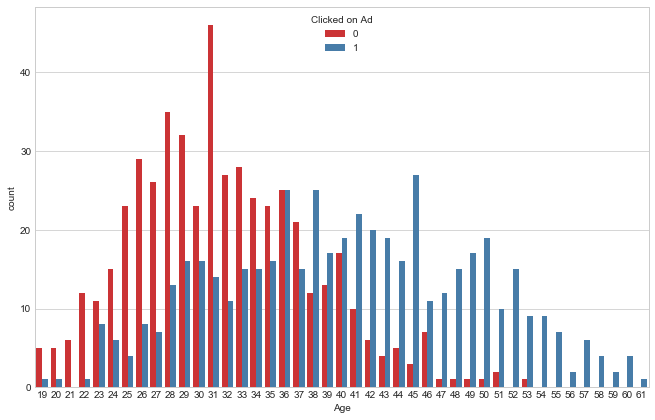

In [39]:
plt.figure(figsize=(11,7))
sns.countplot(x='Age',hue='Clicked on Ad',data=df,palette='Set1')

# Insight 7 : From below graphs we can see that there is high probability of clicking on the advertisment by Female than by a Male

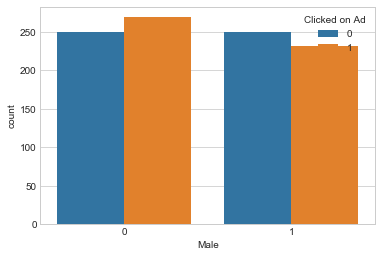

In [40]:
sns.countplot(x='Male',hue='Clicked on Ad',data=df)

# Insight 8 : User with age of around 30 years are doing daily internet usage between 200 MB to 250 MB, whereas users between age of 35 to 45 years are having daily internet usage of 125MB

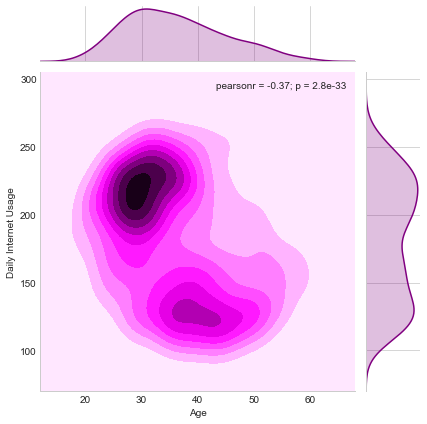

In [41]:
sns.jointplot(x='Age',y='Daily Internet Usage',data=df,color='purple',kind='kde')

# Insight 9 : Majority of the users are around age of 30 in the category of area income which ranges between 60000USD to 70000 USD

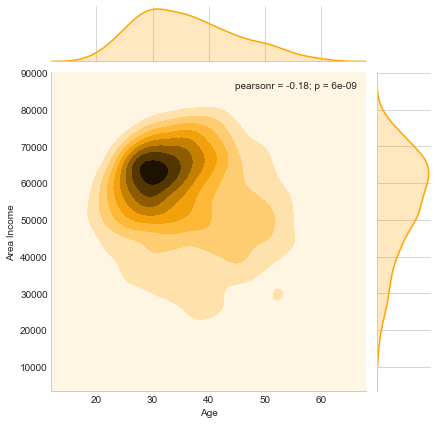

In [42]:
sns.jointplot(x='Age',y='Area Income',data=df,color='orange',kind='kde')

# Insight 9 : As per below trend differed between Gender and clicked on Ad.We can see that for Male or female who are having daily internet usage of around 150 units are more prone to click on an advertisement whereas as for users whose usage limit is more than 200 MB they are not interested in advertisements. This tells us that the user who is mostly clicking on advertisement is mostly doing internet browsing especially reading online articles and few online videos.

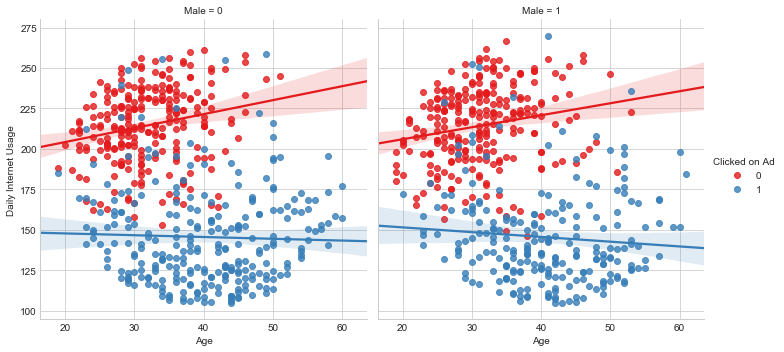

In [43]:
plt.figure(figsize=(11,7))
sns.lmplot(y='Daily Internet Usage',x='Age',data=df,hue='Clicked on Ad',
           col='Male',palette='Set1')

# Applying Machine Learning Model

# 1) Logistic Regression

Split the data into training set and testing set using train_test_split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = adv_df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = adv_df['Clicked on Ad']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Train and fit a logistic regression model on the training set.

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Predictions and Evaluations

Now predict values for the testing data.

In [49]:
predictions = logmodel.predict(X_test)

Create a classification report for the model.

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.84      0.97      0.90       146
          1       0.96      0.82      0.89       154

avg / total       0.90      0.89      0.89       300



In [56]:
print(confusion_matrix(y_test,predictions))

[[141   5]
 [ 27 127]]


Here we can see that accuracy of above model is having precision of avg/total as 90%

# 2) Decision Tree

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Male                        1000 non-null int64
Clicked on Ad               1000 non-null int64
Date                        1000 non-null int64
Year                        1000 non-null int64
Month                       1000 non-null int64
dtypes: float64(3), int64(6)
memory usage: 70.4 KB


In [58]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Date,Year,Month
0,68.95,35,61833.90,256.09,0,0,27,2016,3
1,80.23,31,68441.85,193.77,1,0,4,2016,4
2,69.47,26,59785.94,236.50,0,0,13,2016,3
3,74.15,29,54806.18,245.89,1,0,10,2016,1
4,68.37,35,73889.99,225.58,0,0,3,2016,6


In [59]:
df.Year.unique

<bound method Series.unique of 0      2016
1      2016
2      2016
3      2016
4      2016
5      2016
6      2016
7      2016
8      2016
9      2016
10     2016
11     2016
12     2016
13     2016
14     2016
15     2016
16     2016
17     2016
18     2016
19     2016
20     2016
21     2016
22     2016
23     2016
24     2016
25     2016
26     2016
27     2016
28     2016
29     2016
       ... 
970    2016
971    2016
972    2016
973    2016
974    2016
975    2016
976    2016
977    2016
978    2016
979    2016
980    2016
981    2016
982    2016
983    2016
984    2016
985    2016
986    2016
987    2016
988    2016
989    2016
990    2016
991    2016
992    2016
993    2016
994    2016
995    2016
996    2016
997    2016
998    2016
999    2016
Name: Year, Length: 1000, dtype: int64>

# Categorical Features


In [60]:
cat_feats = ['Date','Month','Year']

In [61]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [62]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Male                        1000 non-null int64
Clicked on Ad               1000 non-null int64
Date_2                      1000 non-null uint8
Date_3                      1000 non-null uint8
Date_4                      1000 non-null uint8
Date_5                      1000 non-null uint8
Date_6                      1000 non-null uint8
Date_7                      1000 non-null uint8
Date_8                      1000 non-null uint8
Date_9                      1000 non-null uint8
Date_10                     1000 non-null uint8
Date_11                     1000 non-null uint8
Date_12                     1000 non-null uint8
Date_13                     1000 non-null uint8
Date_14                 

# Here while creating dummies Year has already been dropped because there was only one value.

# Train Test Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = final_data.drop('Clicked on Ad',axis=1)
y = final_data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Training a Decision Tree Model

In [65]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()


In [66]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [67]:
predictions = dtree.predict(X_test)

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.97      0.94      0.95       157
          1       0.94      0.97      0.95       143

avg / total       0.95      0.95      0.95       300



In [70]:
print(confusion_matrix(y_test,predictions))

[[148   9]
 [  5 138]]


Here we can see that with Decision tree precision of avg/total is around 95%.

# 3)Training the Random Forest model

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc = RandomForestClassifier(n_estimators=600)

In [73]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [78]:
predictions = rfc.predict(X_test)

In [79]:
from sklearn.metrics import classification_report,confusion_matrix

In [80]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.94      0.97      0.96       157
          1       0.96      0.94      0.95       143

avg / total       0.95      0.95      0.95       300



In [81]:
print(confusion_matrix(y_test,predictions))

[[152   5]
 [  9 134]]


Here with Random Forest overall precision remains same at 95% with accuracy of 95.3%.When we compare the confusion matrix of Decision Tree with Random Forest, overall sum of True Negative and True Positive of Random Forest has been same but there has been reallignment in the values as Random Forest's Confusion Matrix.

Right now as per the dataset which has1000 records, Decision tree and Random Forest are equally good. But if number of records are increased then Random Forest might be better model to predict 'Clicked on Ad' parameter as it would predict values by collectivly processing the ensemble of decision trees.